In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

<ipython-input-2-688361187c29>:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x_values_mesh, y_values_mesh, V_polar, cmap='viridis')


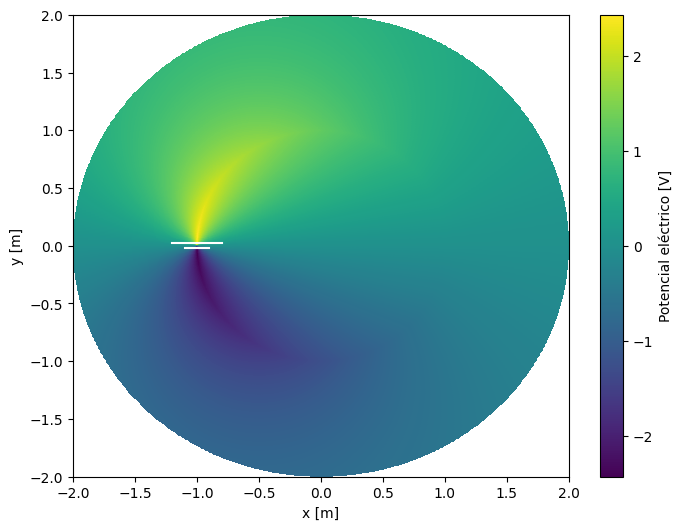

In [2]:
# distribuido

def potencial_distribuido(rs_mesh, thetas_mesh, V_0, a, alpha, N_terms):
    V = np.zeros_like(rs_mesh) 

    r_less_a = rs_mesh < a
    r_greater_equal_a = rs_mesh >= a

    arctan_less_a = np.arctan(rs_mesh * np.sin(thetas_mesh) / (a + rs_mesh * np.cos(thetas_mesh)))
    V[r_less_a] = (V_0/np.pi) * arctan_less_a[r_less_a]  

    arctan_greater_equal_a = np.arctan( a * np.sin(thetas_mesh) / (rs_mesh + a * np.cos(thetas_mesh)))
    V[r_greater_equal_a] = (V_0/np.pi) * arctan_greater_equal_a[r_greater_equal_a] 
    
    return V

# Definimos los parámetros
V_0 = 5  # V
a = 1    # m
alpha = np.deg2rad(30) # 30 grados
N_terms = 100    

# Definimos el espacio donde calcularemos el potencial en coordenadas polares
r_values = np.linspace(0, 2 * a, 1000)
theta_values = np.linspace(-np.pi, np.pi, 1000)

r_values_mesh, theta_values_mesh = np.meshgrid(r_values, theta_values)

V_polar = potencial_distribuido(r_values_mesh, theta_values_mesh, V_0, a, alpha, N_terms)

x_values_mesh = r_values_mesh * np.cos(theta_values_mesh)
y_values_mesh = r_values_mesh * np.sin(theta_values_mesh)

plt.figure(figsize=(8, 6))
plt.pcolormesh(x_values_mesh, y_values_mesh, V_polar, cmap='viridis')
plt.colorbar(label='Potencial eléctrico [V]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
#plt.title('Potencial eléctrico en coordenadas \ncartesianas para resistor distribuido')

# líneas de la batería
x_battery_pos = np.linspace(-1.2, -0.8, 100)
x_battery_neg = np.linspace(-1.1, -0.9, 100)
y_battery_pos = np.full(100, 0.02)
y_battery_neg = np.full(100, -0.02)
plt.plot(x_battery_pos, y_battery_pos, c='w', linewidth = 1.5)
plt.plot(x_battery_neg, y_battery_neg, c='w', linewidth = 1.5)

plt.savefig('potencial_distribuido_dpi.png', dpi=400)
plt.show()


# Nueva sección

<ipython-input-3-c0534a4667d6>:14: RuntimeWarning: divide by zero encountered in true_divide
  suma_greater_equal_a = ((a / rs_mesh) ** k) * (np.sin(k * alpha) / (alpha*(k**2))) * np.sin(k * thetas_mesh)
<ipython-input-3-c0534a4667d6>:43: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x_values_mesh, y_values_mesh, V_polar, cmap='viridis')


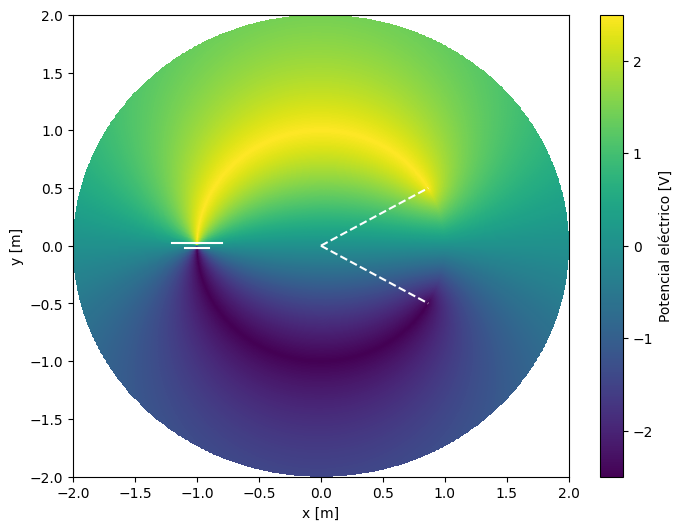

In [3]:
# concentrado

def potencial_concentrado(rs_mesh, thetas_mesh, V_0, a, alpha, N_terms):
    V = np.zeros_like(rs_mesh) 

    r_less_a = rs_mesh < a
    r_greater_equal_a = rs_mesh >= a
    
    k_values = np.arange(1, N_terms + 1)
    for k in k_values:
        suma_less_a = ((rs_mesh / a) ** k) * (np.sin(k * alpha) / (alpha*(k**2))) * np.sin(k * thetas_mesh)
        V[r_less_a] += suma_less_a[r_less_a]

        suma_greater_equal_a = ((a / rs_mesh) ** k) * (np.sin(k * alpha) / (alpha*(k**2))) * np.sin(k * thetas_mesh)
        V[r_greater_equal_a] += suma_greater_equal_a[r_greater_equal_a]

    arctan_less_a = np.arctan(rs_mesh * np.sin(thetas_mesh) / (a + rs_mesh * np.cos(thetas_mesh)))
    V[r_less_a] += arctan_less_a[r_less_a]  
    V[r_less_a] *= (V_0/np.pi)

    arctan_greater_equal_a = np.arctan( a * np.sin(thetas_mesh) / (rs_mesh + a * np.cos(thetas_mesh)))
    V[r_greater_equal_a] += arctan_greater_equal_a[r_greater_equal_a] 
    V[r_greater_equal_a] *= (V_0/np.pi)

    return V

# Parámetros
V_0 = 5  # V
a = 1    # m
alpha = np.deg2rad(30) # 30 grados
N_terms = 100  

r_values = np.linspace(0, 2 * a, 1000)
theta_values = np.linspace(-np.pi, np.pi, 1000)

r_values_mesh, theta_values_mesh = np.meshgrid(r_values, theta_values)
V_polar = potencial_concentrado(r_values_mesh, theta_values_mesh, V_0, a, alpha, N_terms)

x_values_mesh = r_values_mesh * np.cos(theta_values_mesh)
y_values_mesh = r_values_mesh * np.sin(theta_values_mesh)

plt.figure(figsize=(8, 6))
plt.pcolormesh(x_values_mesh, y_values_mesh, V_polar, cmap='viridis')
plt.colorbar(label='Potencial eléctrico [V]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
#plt.title('Potencial eléctrico en coordenadas \ncartesianas para resistor concentrado')

# líneas del resistor
length = a  
x_line = np.linspace(0, length * np.cos(alpha), 100)
y_line_pos = np.linspace(0, length * np.sin(alpha), 100)
y_line_neg = np.linspace(0, -length * np.sin(alpha), 100)
plt.plot(x_line, y_line_pos, 'w--', label='30° Line')
plt.plot(x_line, y_line_neg, 'w--', label='30° Line')
# líneas de la batería
x_battery_pos = np.linspace(-1.2, -0.8, 100)
x_battery_neg = np.linspace(-1.1, -0.9, 100)
y_battery_pos = np.full(100, 0.02)
y_battery_neg = np.full(100, -0.02)
plt.plot(x_battery_pos, y_battery_pos, c='w', linewidth = 1.5)
plt.plot(x_battery_neg, y_battery_neg, c='w', linewidth = 1.5)

plt.savefig('potencial_concentrado_dpi.png', dpi=400)
plt.show()


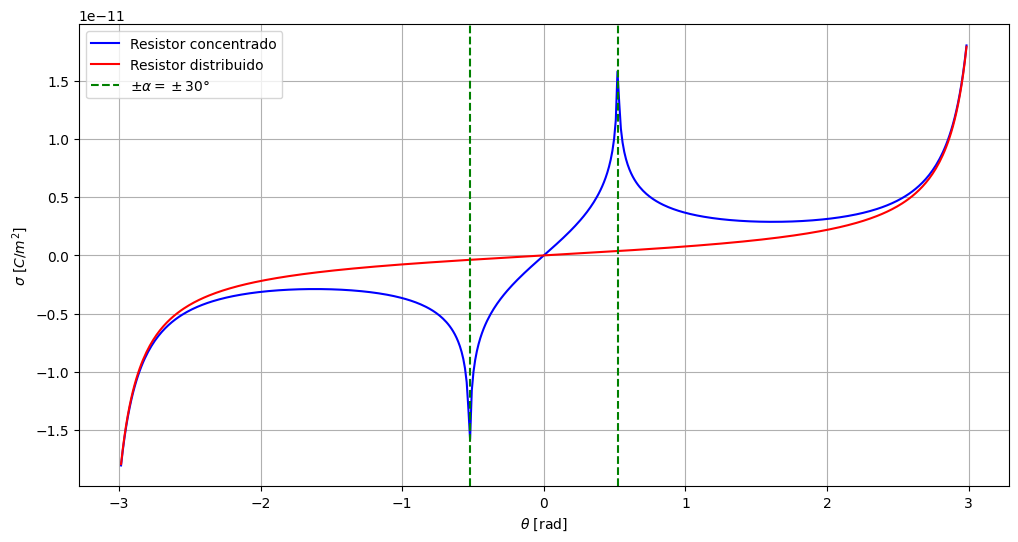

In [4]:
# sigma

def sigma_distribuido(theta):

  return (e_0*V_0/(2*np.pi*a)) * np.tan(theta/2)

def sigma_concentrado(theta):

  cte = e_0*V_0 / (2*np.pi*a)
  abs = np.sin(0.5*(theta + alpha)) / np.sin(0.5*(theta - alpha))

  return cte * (np.tan(0.5*theta) + (1/alpha)*np.log(np.abs(abs)))

V_0 = 1 # V
e_0 = constants.epsilon_0 # F/m
a = 1 # m
alpha = np.deg2rad(30) # 30 grados
porcentaje = 0.95
thetas = np.linspace(-np.pi*porcentaje, np.pi*porcentaje, 500)
sigmas1 = sigma_concentrado(thetas)
sigmas2 = sigma_distribuido(thetas)

plt.figure(figsize=(12, 6))
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\sigma$ $[C/m^2]$')
plt.plot(thetas, sigmas1, c='b', label = 'Resistor concentrado')
plt.plot(thetas, sigmas2, c = 'r', label = 'Resistor distribuido')
plt.axvline(x=alpha, color='g', linestyle='--', label = r'$\pm\alpha =\pm 30°$ ')
plt.axvline(x=-alpha, color='g', linestyle='--')
plt.grid()
plt.legend()
plt.savefig('sigma_dpi.png', dpi = 400)
plt.show()
